C:\Users\Tjend\AppData\Local\Temp/ipykernel_22464/3443357669.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(livingArea[:,np.newaxis], prices)


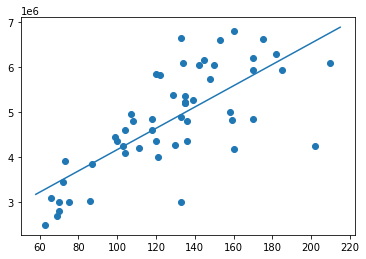

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

dataFolder = "data-prob-1"
infoHousesFile = os.path.join(dataFolder, "data_assignment2.csv")
infoHouses = pd.read_csv(infoHousesFile, index_col = False)

infoHouses = infoHouses.drop([40,45], axis=0)
infoHouses.reset_index(drop=True, inplace=True)

livingArea = infoHouses.LivingArea
prices = infoHouses.SellingPrice
dataValues = np.array([livingArea, prices])

model = LinearRegression()
model.fit(livingArea[:,np.newaxis], prices)
N = 1000
xFit = np.linspace(min(livingArea)-5, max(livingArea)+5, N)
yFit = model.predict(xFit[:,np.newaxis])
plt.scatter(livingArea, prices)
plt.plot(xFit, yFit)
plt.show()

We did some data cleaning where we removed outliers since they negatively effect the linear regression alot since they result in a non-accurate visualization of the housemarket prices. There could be multiple reasons why these houses are as cheap as they are, for example if all walls are infected by black mold. 

In [35]:
m = model.intercept_
k = model.coef_[0]

The intercept of figure 1 is 1809821.2159409611 and the slope is 23597.79474944.

In [36]:
model.predict([[100],[150],[200]])

array([4169600.69088546, 5349490.42835771, 6529380.16582996])

The predicted prices of these given living areas are 4169600.69088546 SEK, 5349490.42835771 SEK, 6529380.16582996 SEK respectively.

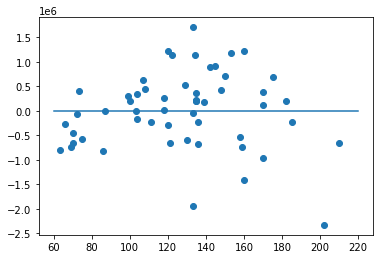

In [37]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
scatterPoints = np.zeros([2,len(dataValues[0])], dtype = float)
for i in range(len(dataValues[0])):
    toAppend = np.array([dataValues[0,i], dataValues[1,i]-model.predict([[dataValues[0,i]]])])
    scatterPoints[:,i] = toAppend

plt.scatter(scatterPoints[0],scatterPoints[1])
plt.plot([60,220], [0,0])
plt.show()

We can see that this residual plot is an unbalanced residuals, since most of the points to the left is below the line, in hte middle the most points are above the residual line and finally the points to the right is also below the residual line. The way to improve the model is to not use a linear regression, but instead create a polynomial regression. In this case we assume second degree polynomial regression to be the most accurate. 